# MNIST Digit Classification using a Multilayer Perceptron in Keras

**EE514: Data Analysis and Machine Learning**

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

In this notebook we show how to train a MLP to classify MNIST digits. 

## Import packages


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%tensorflow_version 1.x

In [ ]:
import keras
import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.regularizers import l2
from keras.callbacks import History
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import seaborn as sns
sns.set_style('white')

Set the random seed to ensure the results are repeatable

In [ ]:
random.seed(31337)

## Specify hyperparameters

Set some hyperparameters

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20

## Load the dataset

Load in the training data, reshape it, and scale it between zero and one

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype(np.float32)
x_test = x_test.reshape(10000, 784).astype(np.float32)
x_train /= 255.0
x_test /= 255.0

11493376/11490434 [==============================] - 1s 0us/step


Show a few examples

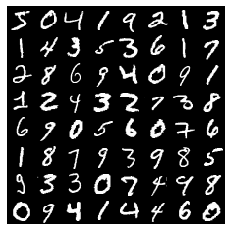

In [ ]:
x_vis = x_train[:64,].reshape(8, 8, 28, 28).transpose(0, 2, 1, 3).reshape(8*28, 8*28)
imshow(x_vis)
gray()
axis('off')
show()

One hot encode the target values

In [ ]:
encoder = OneHotEncoder(n_values=num_classes)
y_train_enc = encoder.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_enc = encoder.fit_transform(y_test.reshape(-1, 1)).todense()

## Specify the model
We'll use a feed forward network with two hidden layers and tanh nonlinearities. Changing the tanh nonlinearities to ReLUs and using dropout can improve performance.

In [ ]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,), kernel_regularizer=l2(1e-5)))
#model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh', kernel_regularizer=l2(1e-5)))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Compile the model. We are doing softmax classification so we will use categorical cross entropy for the loss function. 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## Fit the model

Here we're using the test set as a validation set. This is usually bad practice, but since I'm not tuning any hyperparameters here it's not too big a deal. If you wanted to experiment with different models, however, it would be better to split off a different validation set and use this.

In [ ]:
history_callback = History()
model.fit(x_train, y_train_enc,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_enc),
          callbacks=[history_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 7s 111us/step - loss: 0.3348 - acc: 0.9025 - val_loss: 0.2268 - val_acc: 0.9346
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1437 - acc: 0.9598 - val_loss: 0.1093 - val_acc: 0.9700
Epoch 3/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0993 - acc: 0.9738 - val_loss: 0.0928 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0757 - acc: 0.9817 - val_loss: 0.0932 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0623 - acc: 0.9857 - val_loss: 0.0905 - val_acc: 0.9774
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0531 - acc: 0.9890 - val_loss: 0.0887 - val_acc: 0.9767
Epoch 7/20
60000/60000 [=

## Plot the training and validation loss

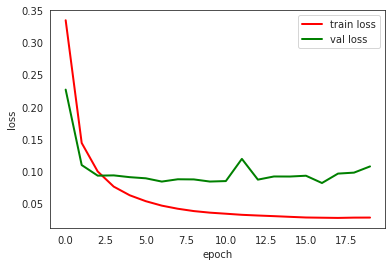

In [ ]:
hist = history_callback.history
loss = hist['loss']
val_loss = hist['val_loss']
plot(loss, 'r-', lw=2, label='train loss')
plot(val_loss, 'g-', lw=2, label='val loss')
legend()
xlabel('epoch')
ylabel('loss')
show()

Ok, we're overfitting a little, but it's not too bad. 

**Exercise**: try add dropout and switch to ReLUs to improve this a bit.

## Visualize the layer weights

Here we visualize the first 100 neurons in the first layer. Each neuron is just a set of $28\times 28$ weights, so we can reshape and display them as little images.

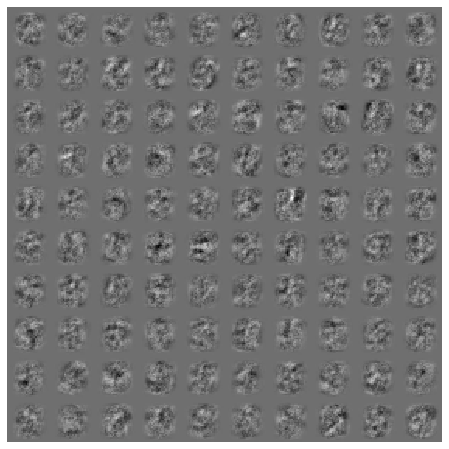

In [ ]:
layer = model.layers[0]
W, b = layer.get_weights()
W = W.reshape(28, 28, 512).transpose(2, 0, 1)
w_vis = W[:100].reshape(10,10,28,28).transpose(0,2,1,3).reshape(10*28,10*28)
figure(figsize=(8,8))
imshow(w_vis)
axis('off')
show()

These are not so easy to interpret. Clearly the model has learned that the pixels at the edges are not so important, and the neurons obviously have some structure that is not just noise, but it is harder to read further into them. The results are a bit more interpretable when using ReLUs and dropout. Try this!